In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
dataset = keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = dataset.load_data()

The number: 5


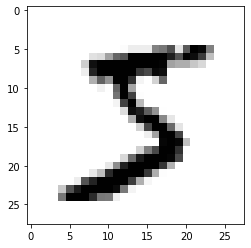

In [4]:
print("The number: "+str(y_train[0]))
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [5]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),0)
        if img is not None:
            images.append(img)
    return images

images_plus = load_images_from_folder('plus')
images_minus = load_images_from_folder('Minus')
images_mul = load_images_from_folder('mul')

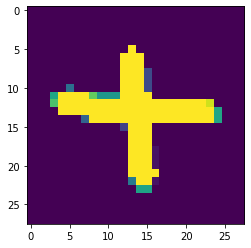

In [7]:
plt.imshow(images_plus[0])
plt.show()

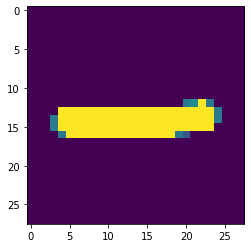

In [8]:
plt.imshow(images_minus[0])
plt.show()

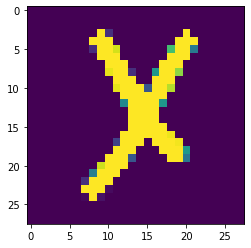

In [9]:
plt.imshow(images_mul[0])
plt.show()

In [10]:
print(np.shape(images_plus))
print(np.shape(images_minus))
print(np.shape(images_mul))

(1000, 28, 28)
(1026, 28, 28)
(1018, 28, 28)


In [11]:
labels_plus = [10 for i in range(1000)]
labels_minus = [11 for i in range(1026)]
labels_mul = [12 for i in range(1018)]

In [12]:
from sklearn.model_selection import train_test_split
x_train_plus, x_test_plus, y_train_plus, y_test_plus = train_test_split(images_plus, labels_plus, test_size=0.1, random_state=7)

In [13]:
x_train_minus, x_test_minus, y_train_minus, y_test_minus = train_test_split(images_minus, labels_minus, test_size=0.1, random_state=7)

In [14]:
x_train_mul, x_test_mul, y_train_mul, y_test_mul = train_test_split(images_mul, labels_mul, test_size=0.1, random_state=7)

In [15]:
x_train = np.concatenate((x_train, x_train_plus, x_train_minus, x_train_mul), axis=0)
x_test = np.concatenate((x_test, x_test_plus, x_test_minus, x_test_mul), axis=0)

In [16]:
y_train = np.concatenate((y_train, y_train_plus, y_train_minus, y_train_mul), axis=0)
y_test = np.concatenate((y_test, y_test_plus, y_test_minus, y_test_mul), axis=0)

In [17]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(62739, 28, 28) (62739,)
(10305, 28, 28) (10305,)


In [18]:
#Applying threshold for removing noise 
_,X_train_th = cv2.threshold(x_train,127,255,cv2.THRESH_BINARY)
_,X_test_th = cv2.threshold(x_test,127,255,cv2.THRESH_BINARY)

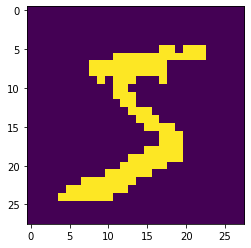

In [19]:
plt.imshow(X_train_th[0])
plt.show()

In [20]:
x_re_train = x_train.reshape(-1, 28, 28, 1)
x_re_test = x_test.reshape(-1, 28, 28, 1)

In [21]:
x_re_train = x_re_train.astype('float32')
x_re_test = x_re_test.astype('float32')

In [22]:
x_re_train = x_re_train/255
x_re_test = x_re_test/255

In [23]:
print(np.unique(y_train))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [24]:
print(x_re_train.shape)
print(y_train.shape)

(62739, 28, 28, 1)
(62739,)


In [25]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(13, activation='softmax')
])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 13)                1

In [27]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [28]:
model.fit(x_re_train, y_train, epochs=5)

Train on 62739 samples
Epoch 1/5
62739/62739 [==============================] - 130s 2ms/sample - loss: 0.1301 - accuracy: 0.9610
Epoch 2/5
62739/62739 [==============================] - 127s 2ms/sample - loss: 0.0421 - accuracy: 0.9870
Epoch 3/5
62739/62739 [==============================] - 127s 2ms/sample - loss: 0.0278 - accuracy: 0.9914
Epoch 4/5
62739/62739 [==============================] - 127s 2ms/sample - loss: 0.0196 - accuracy: 0.9937
Epoch 5/5
62739/62739 [==============================] - 124s 2ms/sample - loss: 0.0157 - accuracy: 0.9948


In [36]:
score = model.evaluate(x_re_test, y_test, verbose=0)

In [30]:
score

[0.027540886909843278, 0.99175155]

In [31]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.027540886909843278
Test accuracy: 0.99175155


In [32]:
pred = model.predict(x_re_test)

In [33]:
print("Actual: ", y_test[0])
print("Predict: ", np.argmax(pred[0]))

Actual:  7
Predict:  7


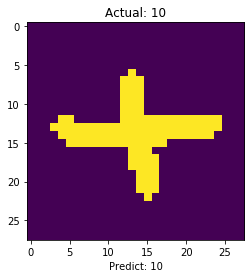

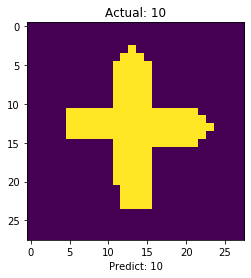

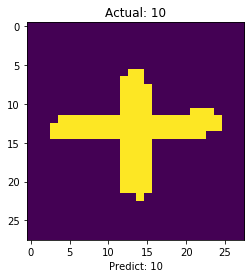

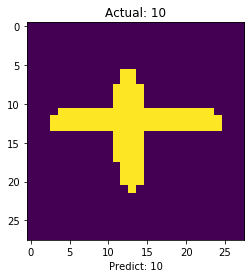

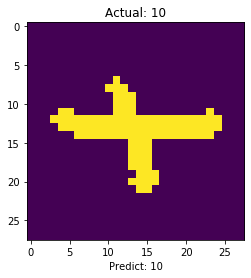

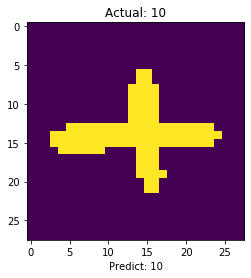

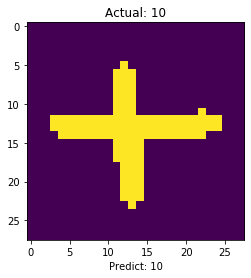

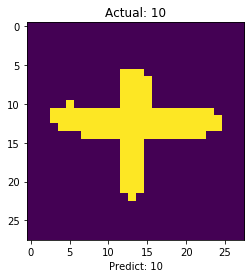

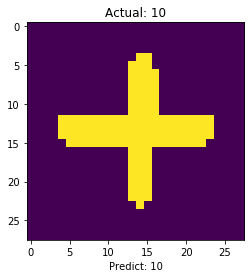

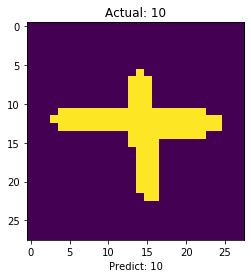

In [34]:
for i in range(10):
    plt.imshow(X_test_th[i+10000])
    plt.title("Actual: "+str(y_test[i+10000]))
    plt.xlabel("Predict: "+str(np.argmax(pred[i+10000])))
    plt.show()

In [35]:
model.save('model.h5')

In [42]:
A = x_re_train.reshape(62739, 28, 28)

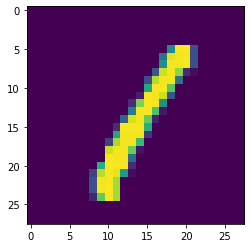

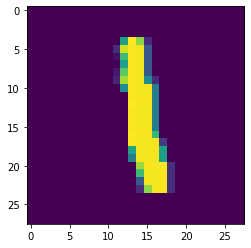

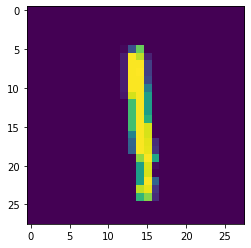

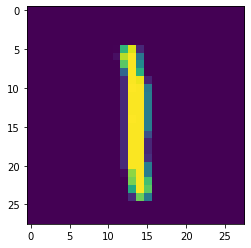

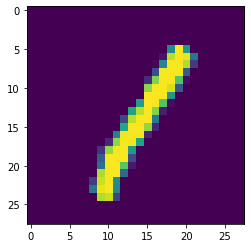

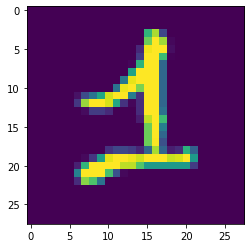

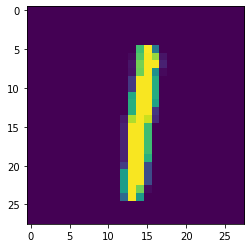

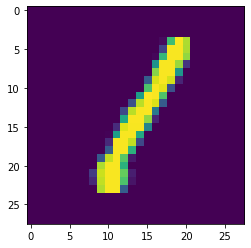

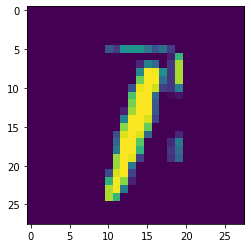

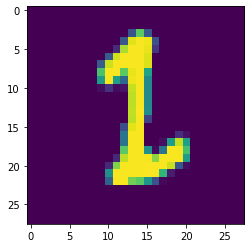

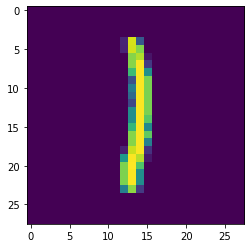

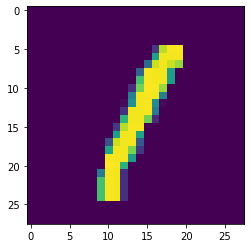

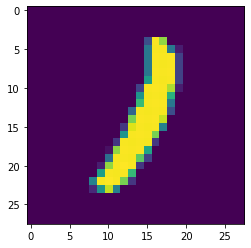

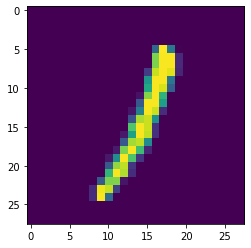

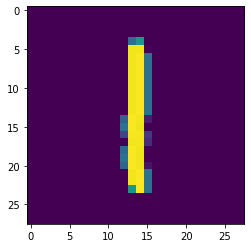

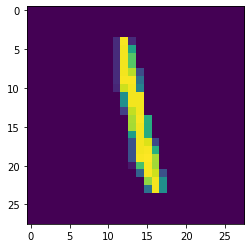

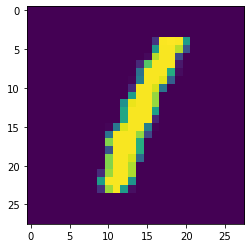

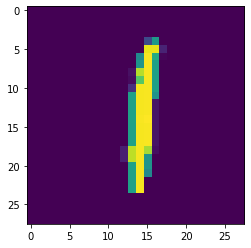

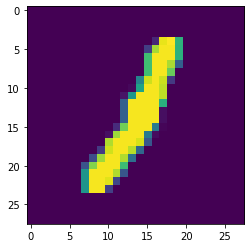

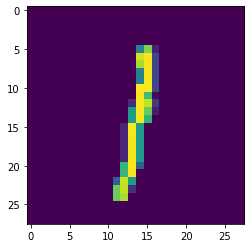

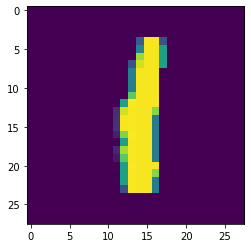

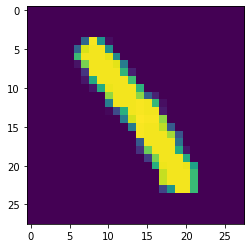

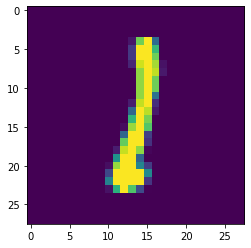

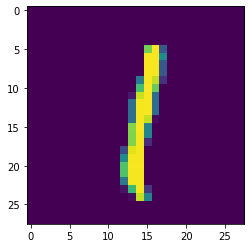

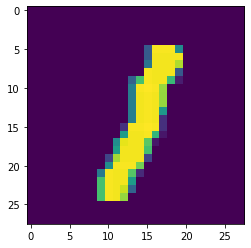

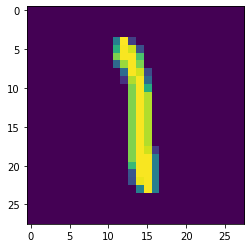

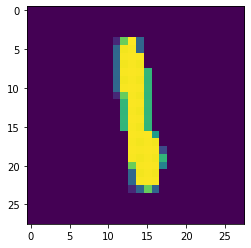

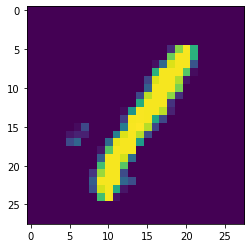

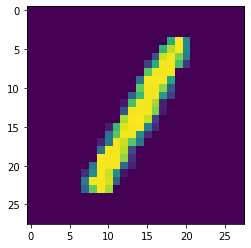

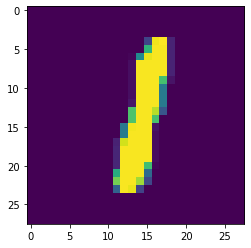

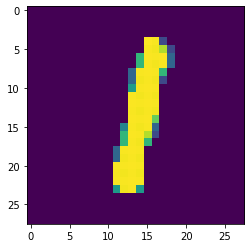

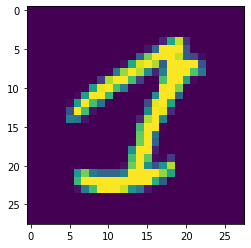

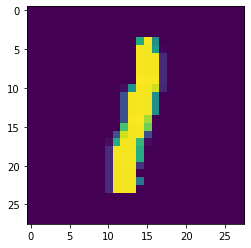

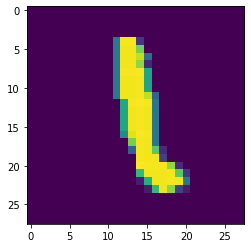

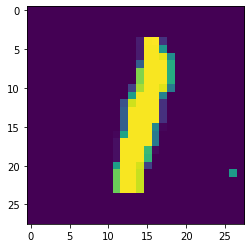

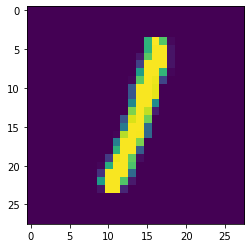

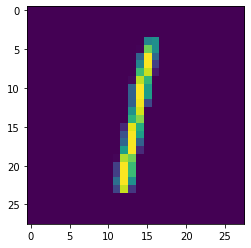

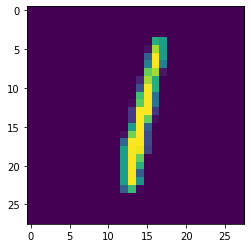

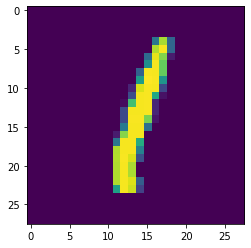

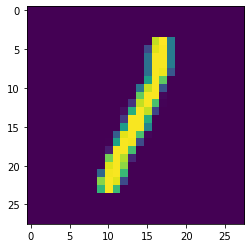

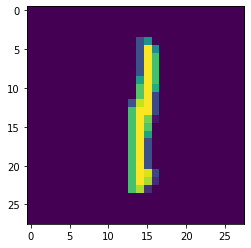

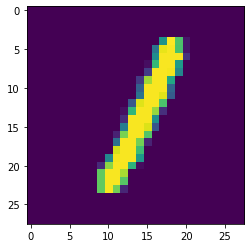

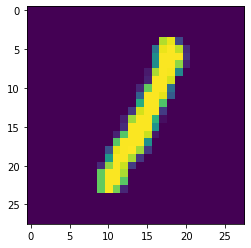

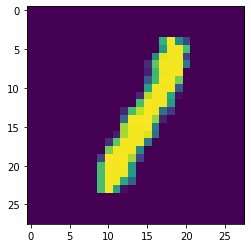

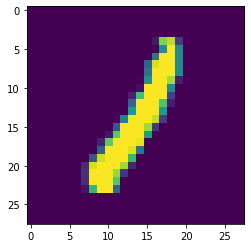

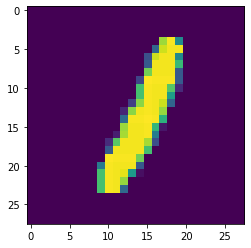

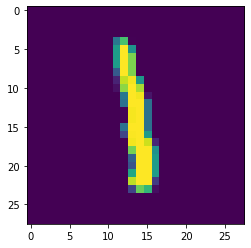

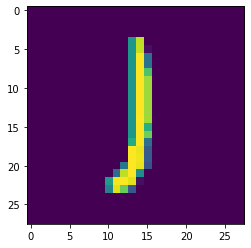

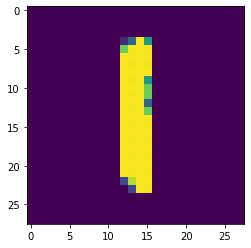

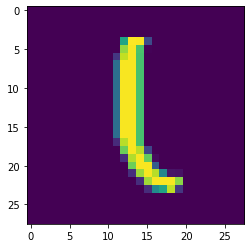

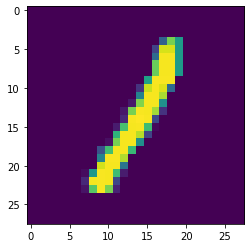

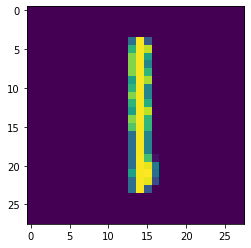

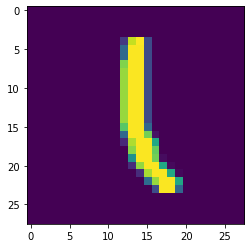

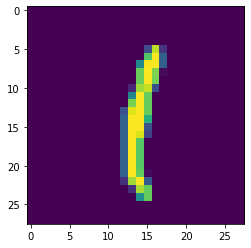

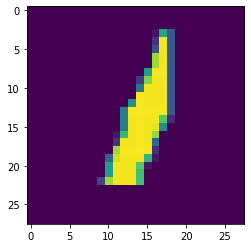

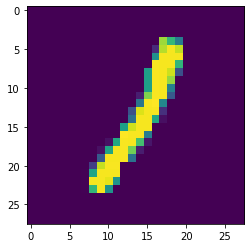

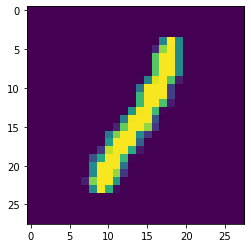

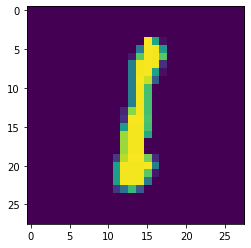

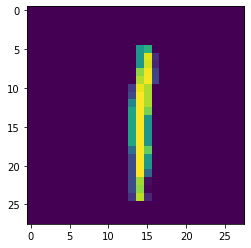

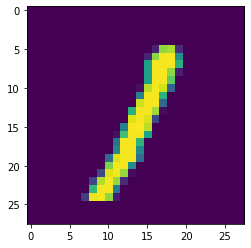

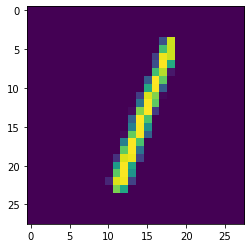

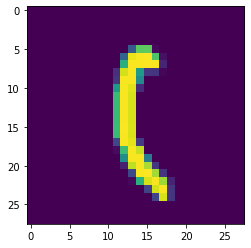

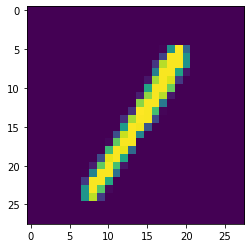

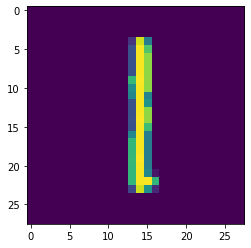

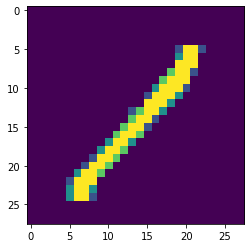

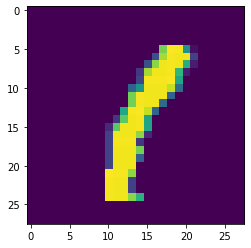

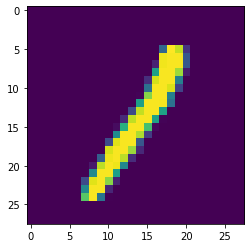

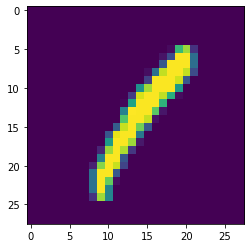

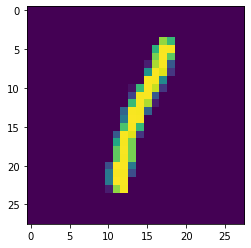

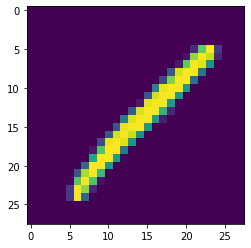

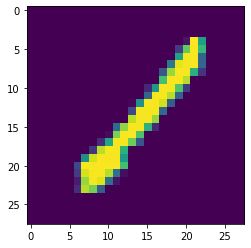

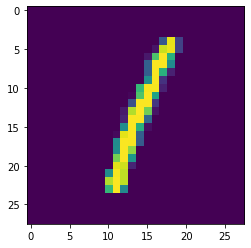

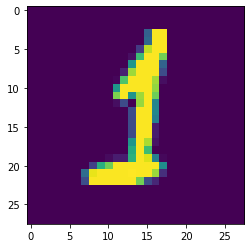

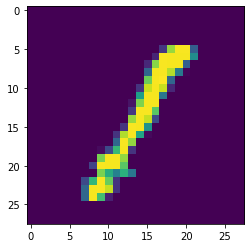

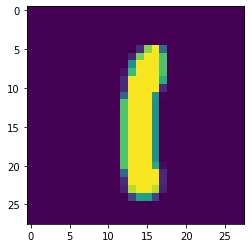

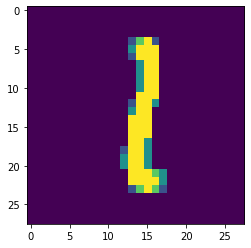

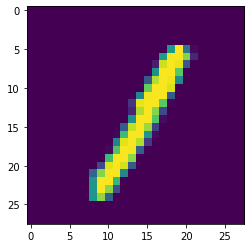

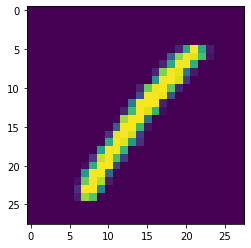

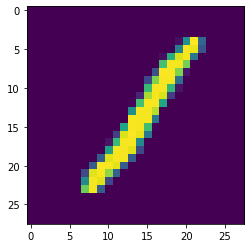

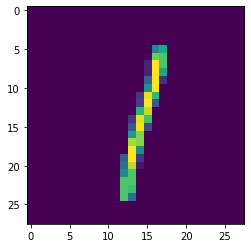

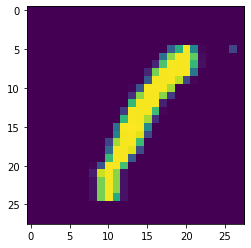

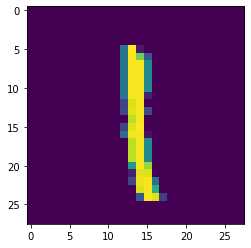

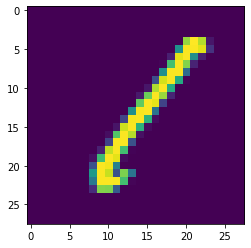

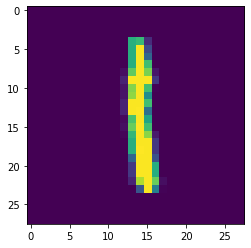

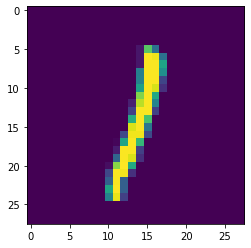

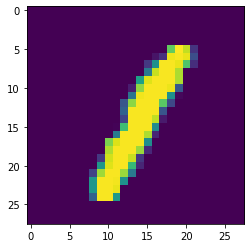

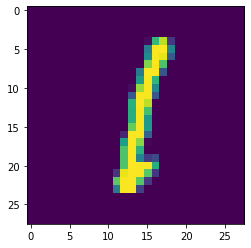

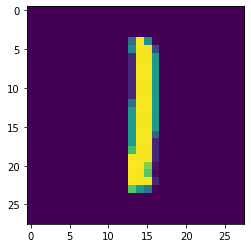

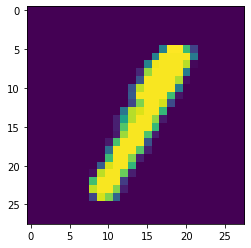

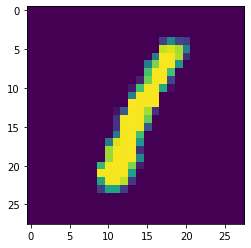

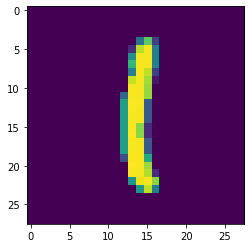

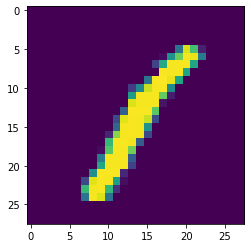

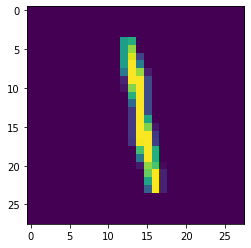

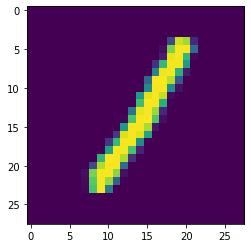

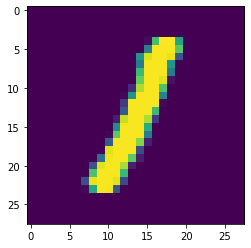

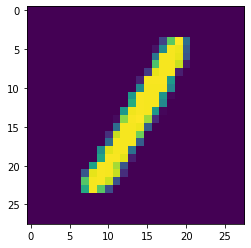

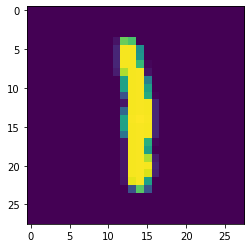

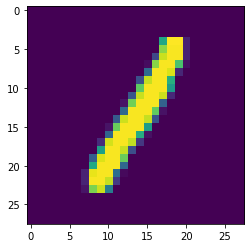

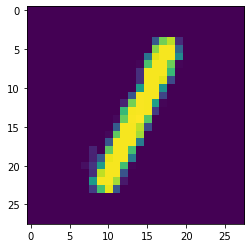

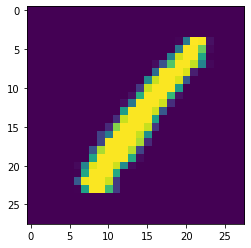

In [43]:
f = 0
for i,x in enumerate(y_train):
    if x == 1:
        plt.imshow(A[i])
        plt.show()
        f = f+1
    if f == 100:
        break